<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=c570fd6fde614882bed4e5baf2ae60839f3f3dcc349d4aa7ab52a8661013f8ca
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [2]:
import pandas as pd
from google.colab import drive 
drive = drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import export_graphviz
from IPython import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [5]:
from keras.utils import to_categorical
train_target = to_categorical(train_target)

In [6]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=train_features.shape[1]))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [7]:
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                1700      
                                                                 
 dense_1 (Dense)             (None, 80)                1680      
                                                                 
 dense_2 (Dense)             (None, 40)                3240      
                                                                 
 dense_3 (Dense)             (None, 20)                820       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 7,683
Trainable params: 7,683
Non-trainabl

In [18]:
history = model.fit(train_features, train_target, epochs = 500, shuffle = True, batch_size=128, validation_split=0.2)

Epoch 1/500
113/113 [==============================] - 1s 5ms/step - loss: 0.7086 - accuracy: 0.6526 - val_loss: 0.6645 - val_accuracy: 0.7453
Epoch 2/500
113/113 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.6608 - val_loss: 0.8820 - val_accuracy: 0.6403
Epoch 3/500
113/113 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.6591 - val_loss: 0.7650 - val_accuracy: 0.6942
Epoch 4/500
113/113 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.6619 - val_loss: 1.2473 - val_accuracy: 0.5056
Epoch 5/500
113/113 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.6642 - val_loss: 1.0483 - val_accuracy: 0.5769
Epoch 6/500
113/113 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.6642 - val_loss: 0.7732 - val_accuracy: 0.6989
Epoch 7/500
113/113 [==============================] - 1s 5ms/step - loss: 0.6851 - accuracy: 0.6715 - val_loss: 0.8914 - val_accuracy: 0.6444

In [19]:
import matplotlib.pyplot as plt

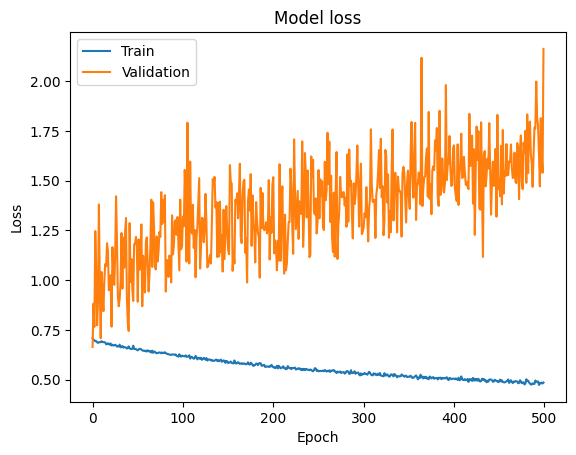

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
 
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
 
plt.show()

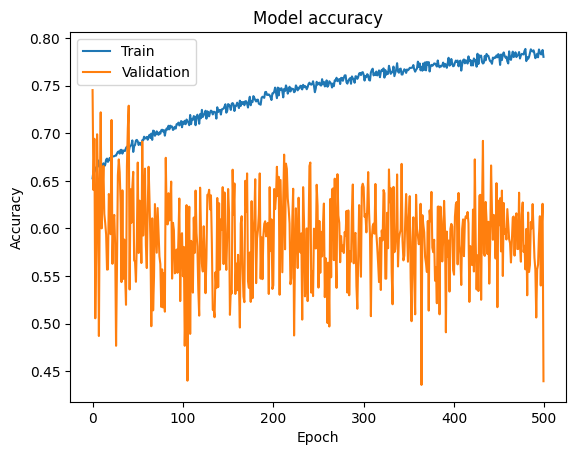

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
 
plt.show()

In [24]:
test_target = to_categorical(test_target, 3)
test_loss, test_accuracy = model.evaluate(test_features, test_target)

131/131 [==============================] - 0s 1ms/step - loss: 2.4472 - accuracy: 0.4144
